<h1><b>Graphs</b></h1>

<p style="font-size: 20px;">Graphs represent relationships between objects. <br>
They are collections of objects along with pairwise connections between its elements.</p>

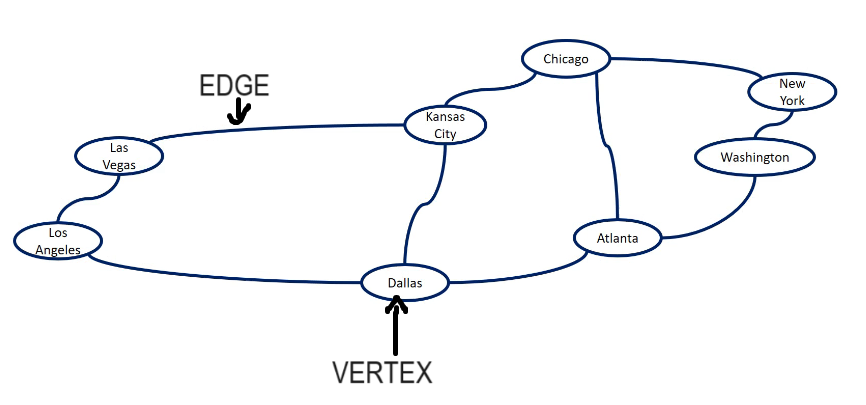

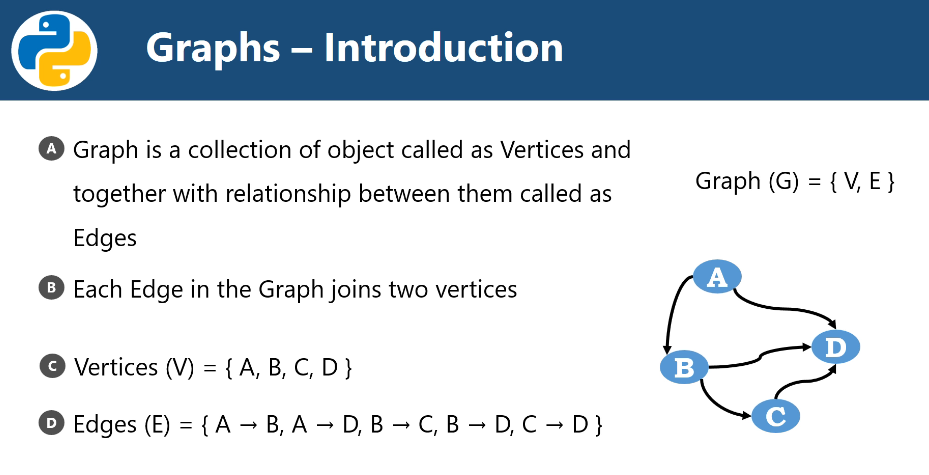

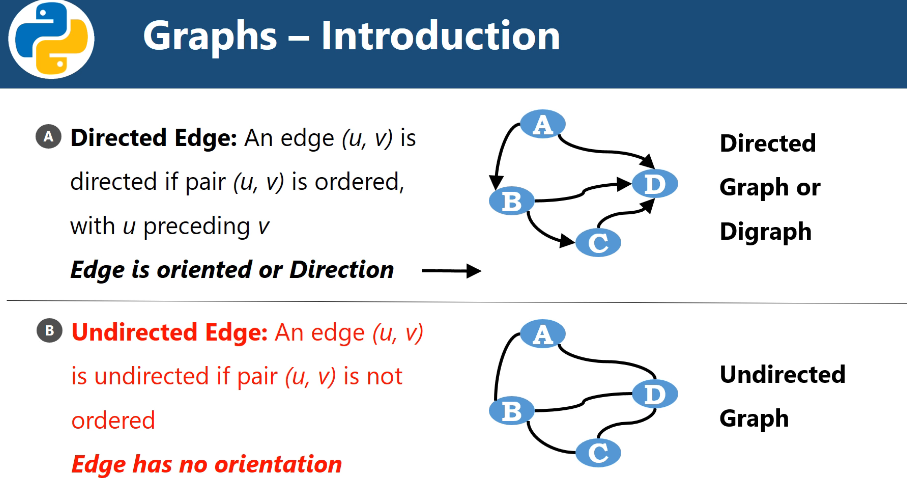

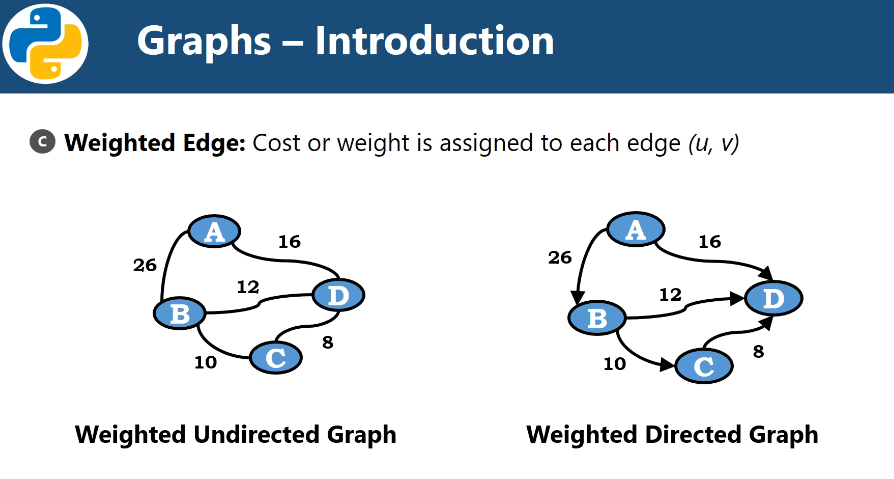

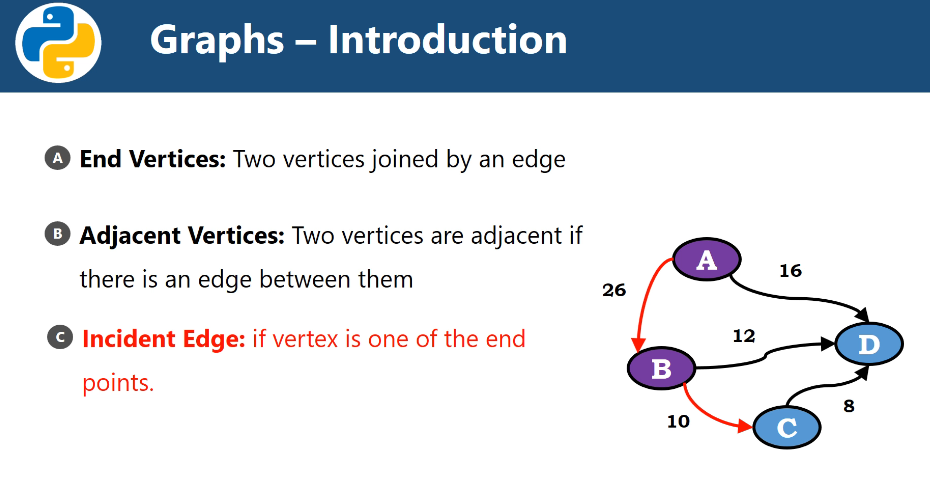

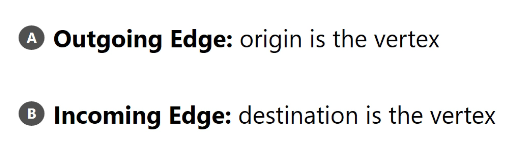

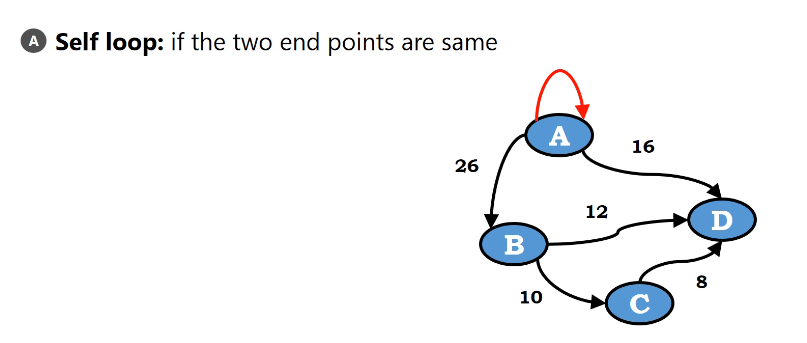

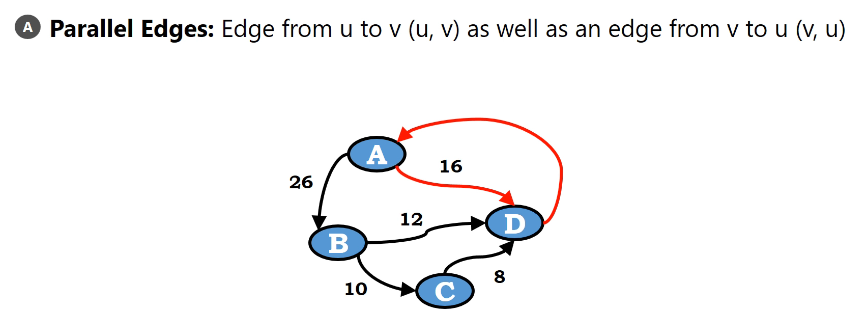

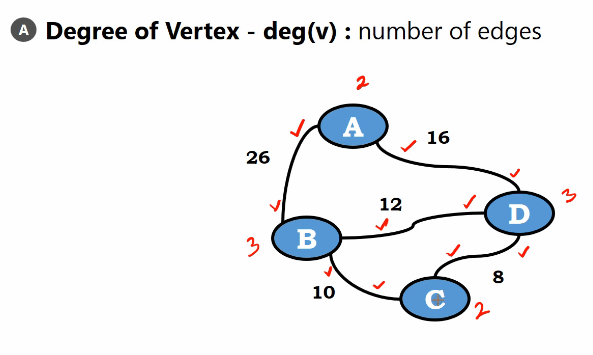

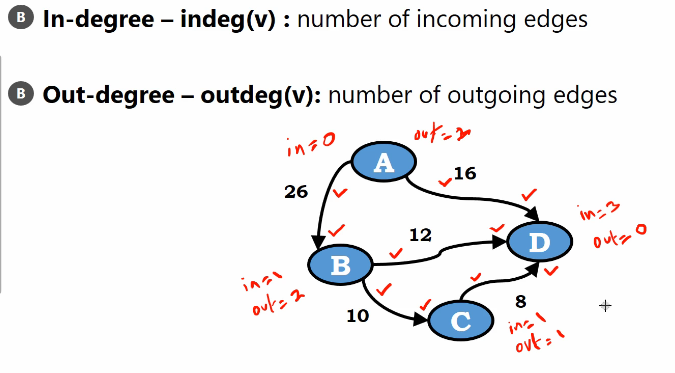

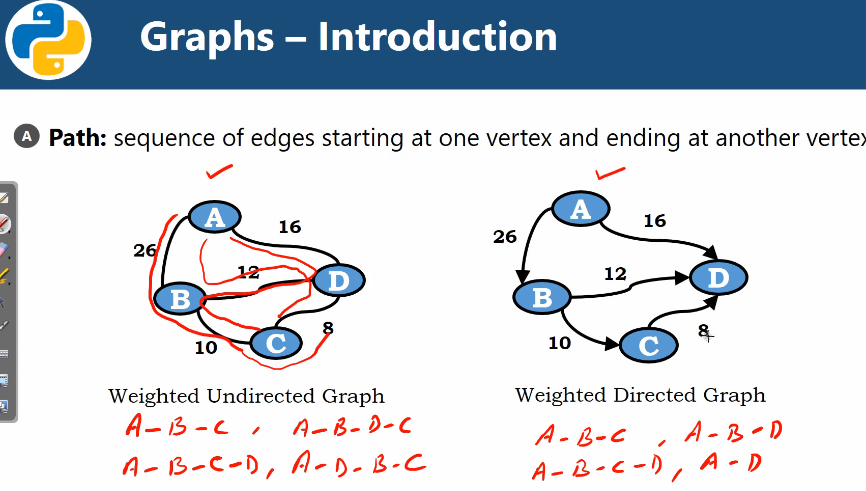

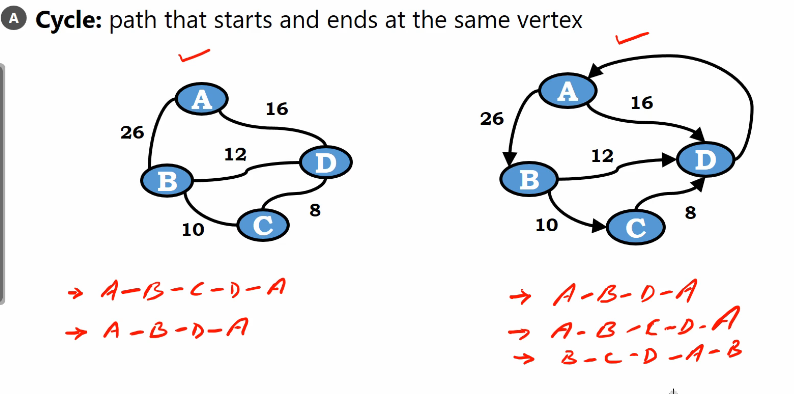

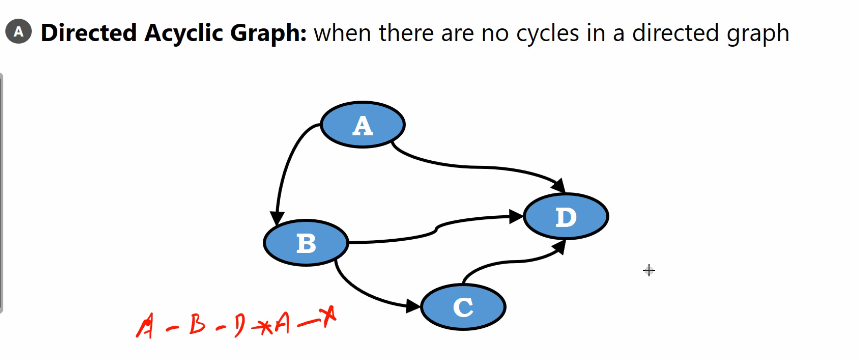

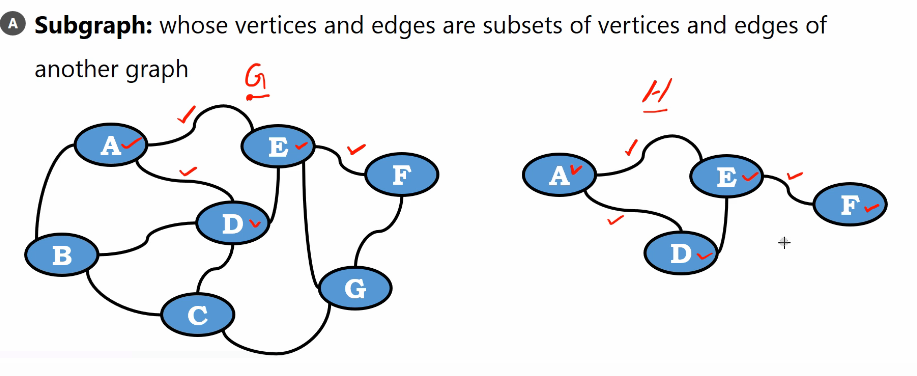

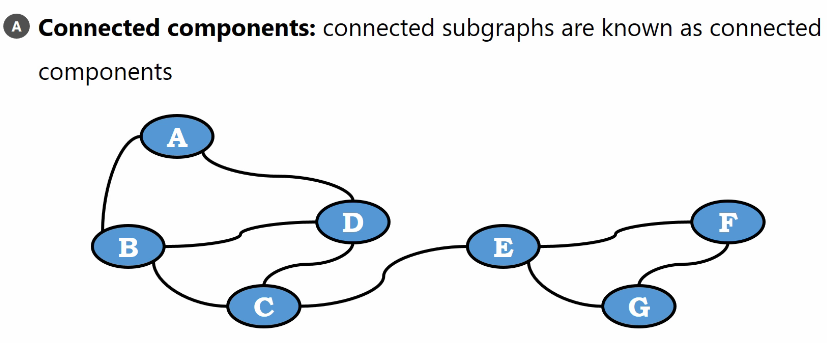

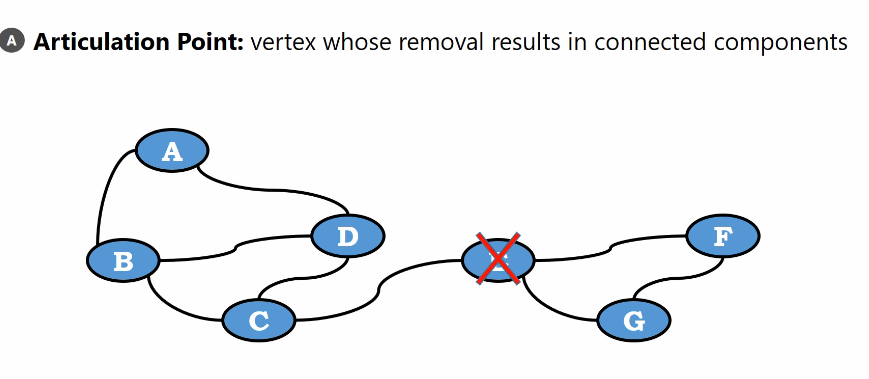

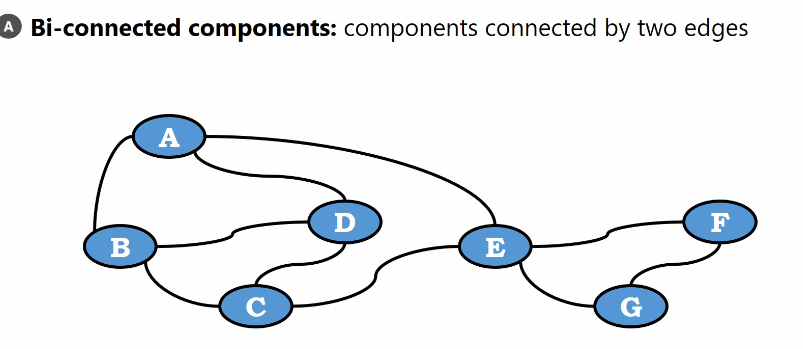

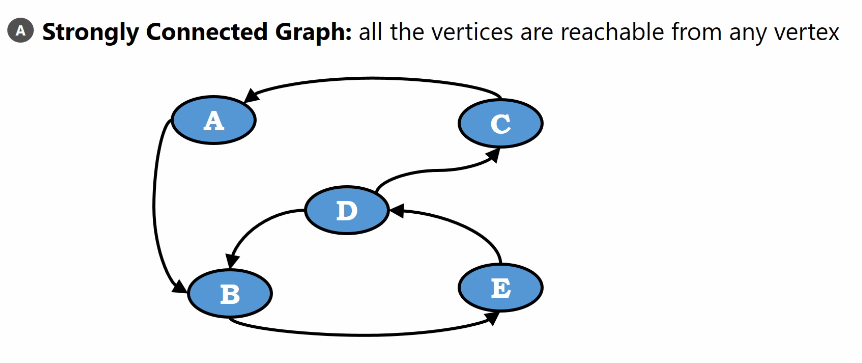

<br><br><br><h2><b>Graph Abstract Data Type</b></h2>

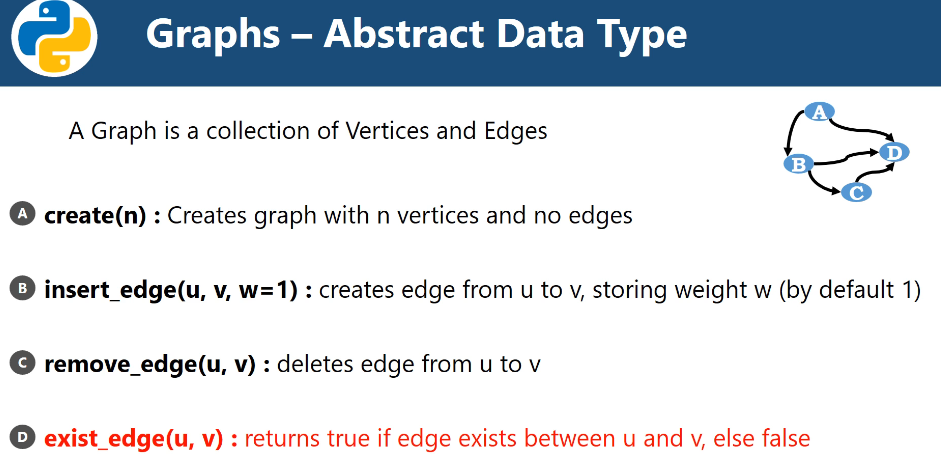

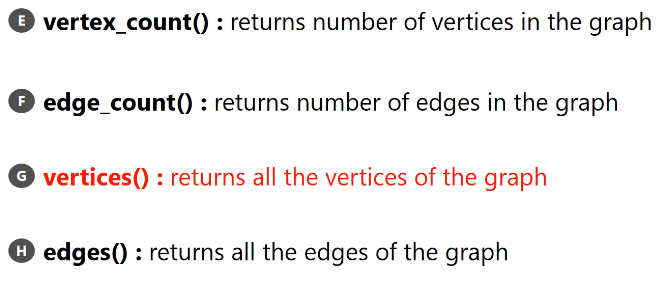

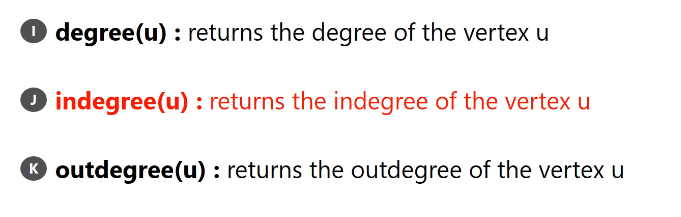

<h2><b>Graph representation</b></h2>

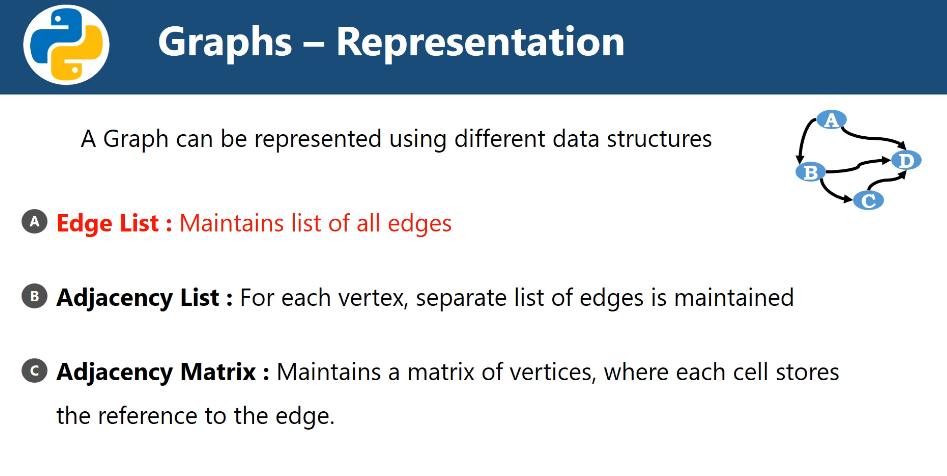

<br><b><h2>Edge list</b></h2>

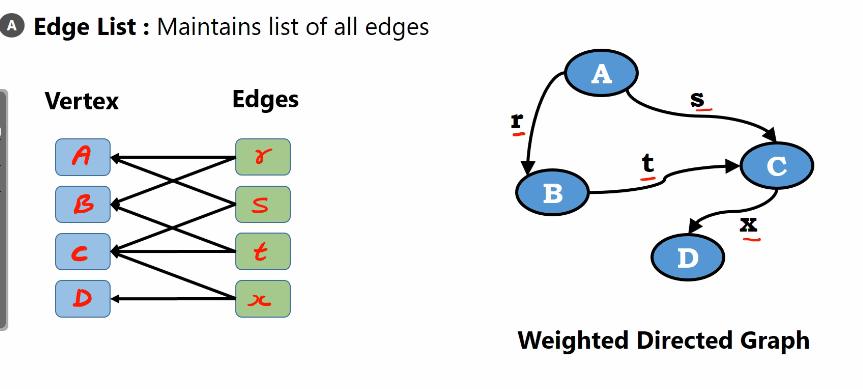

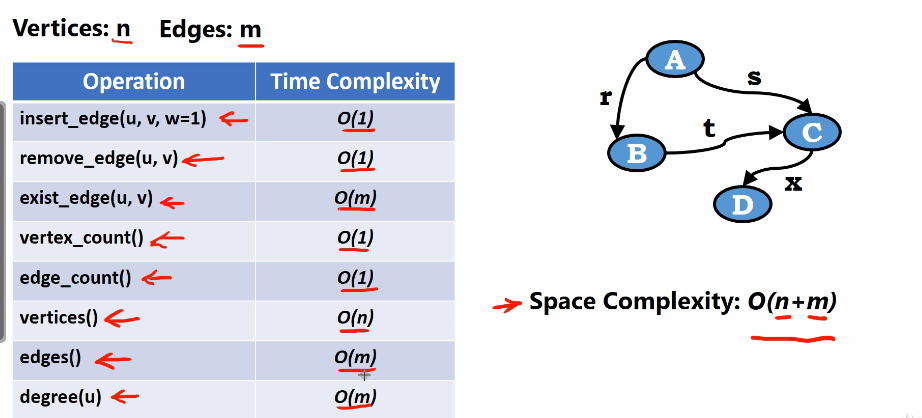

<br><b><h2>Adjacency List</b></h2>

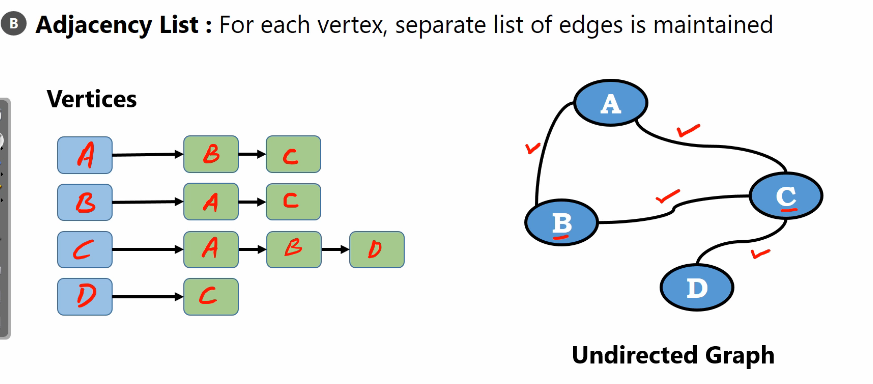

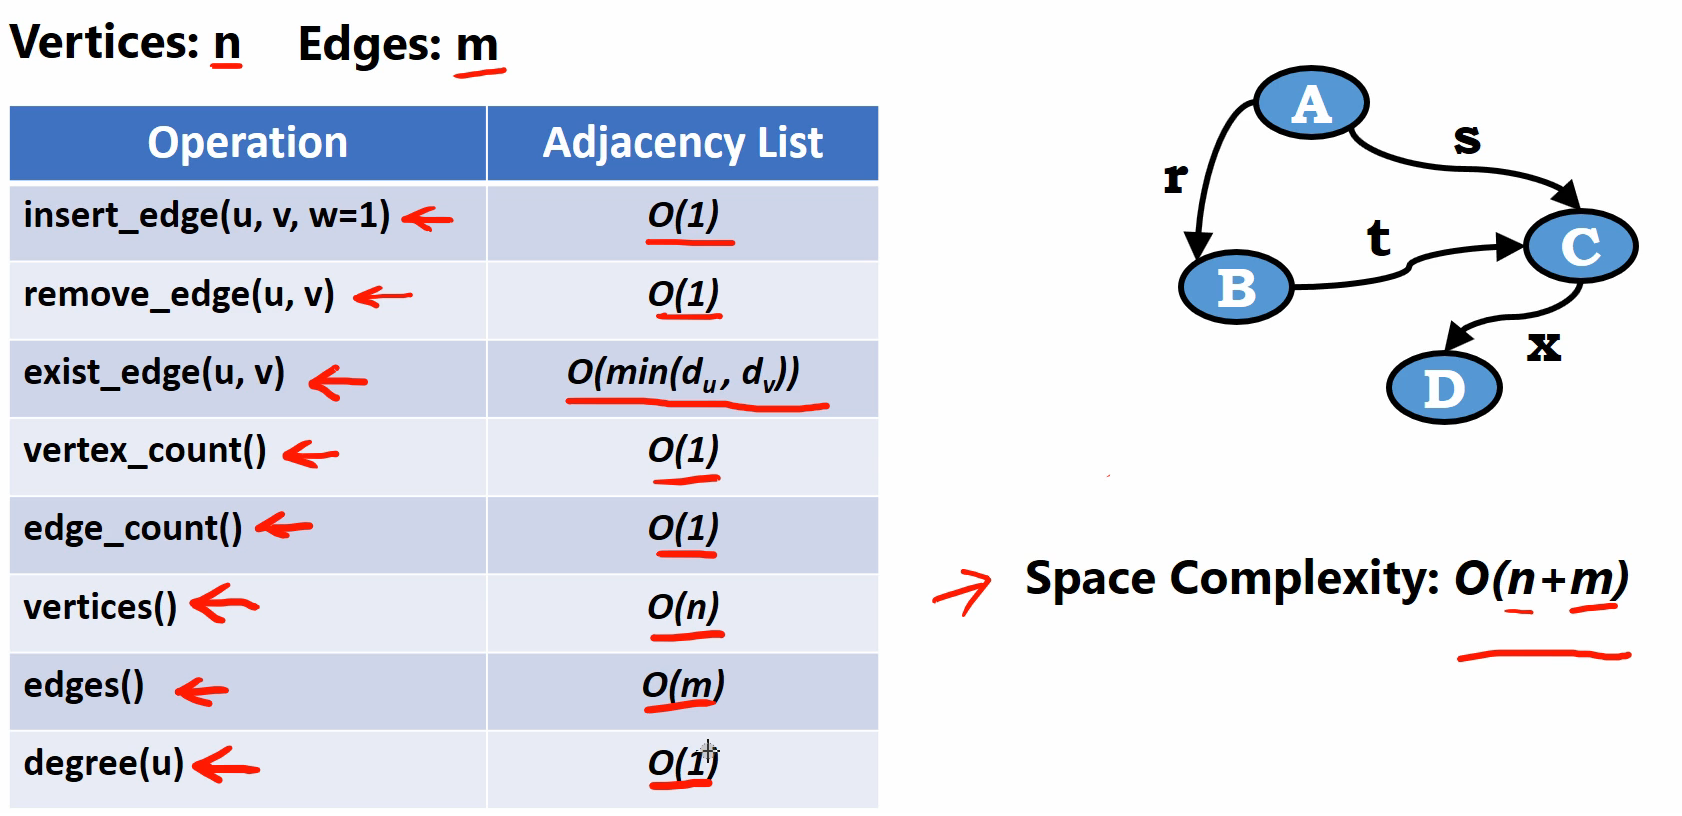

<br><h2><b>Adjacency matrix</b></h2>

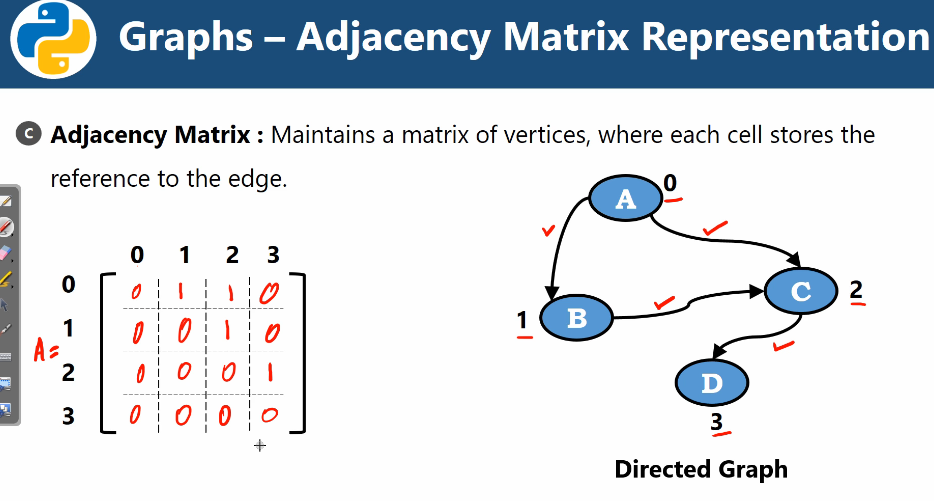

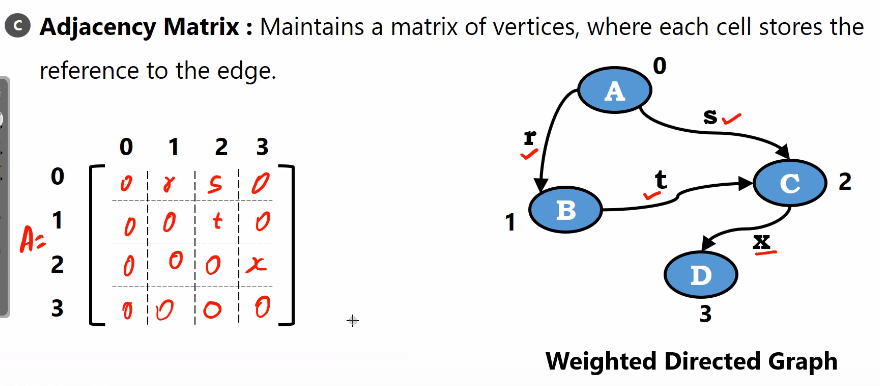

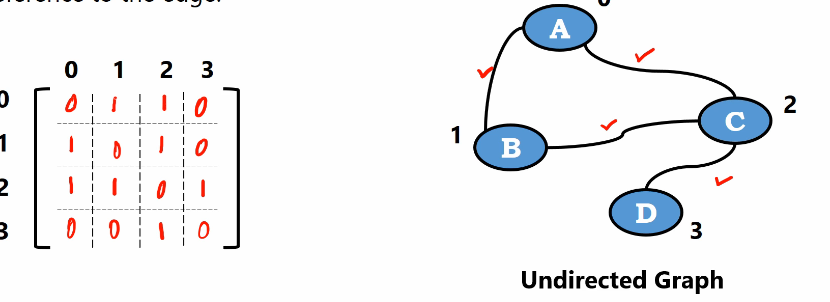

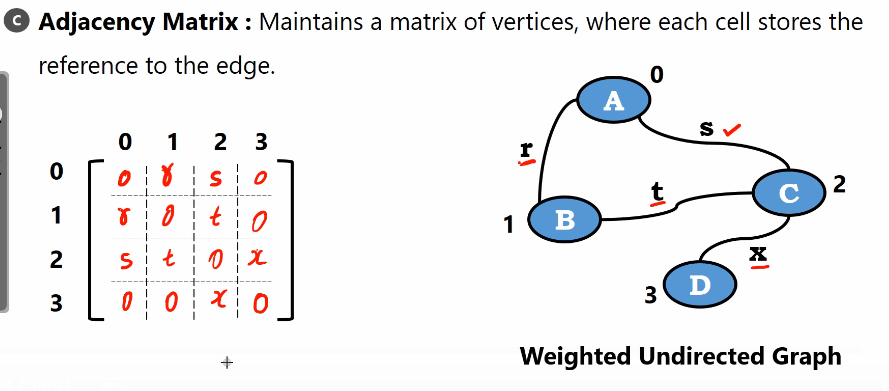

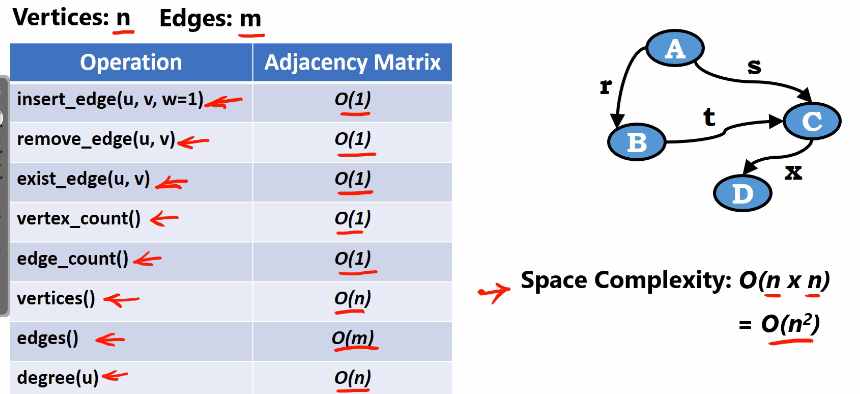

<br><h2><b>Summary of performance</b></h2>

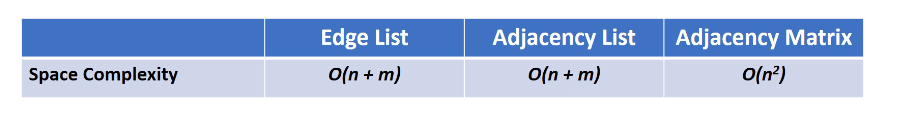

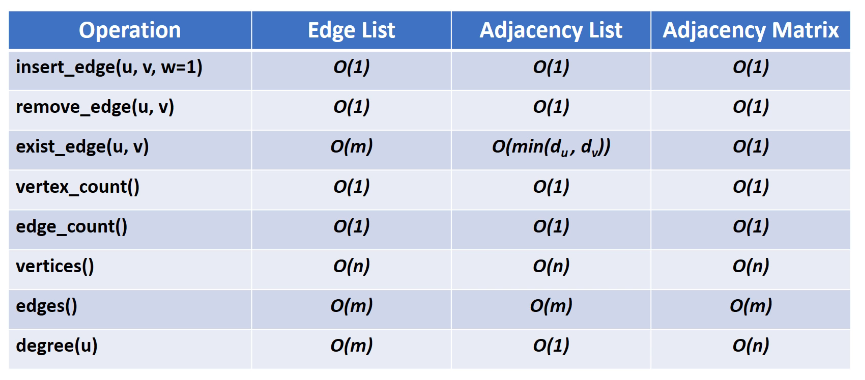

<br><br><b><h2>Graph ADT implementation using adjacency matrix</h2></b>

In [1]:
import numpy as np


class QueueArray:
    __slots__ = '_data'
    def __init__(self):
        """Class constructor. O(1)"""
        self._data = []

    def __len__(self):
        """Allows to use len function on the class. It returns the number of elements in the queue. O(1)"""
        return len(self._data)

    def isempty(self):
        """Returns True if there are no elements in the queue, False otherwise. O(1)"""
        return not len(self._data)

    def enqueue(self, e):
        """Adds element e to the queue (last to be removed). O(1)"""
        self._data.append(e)

    def dequeue(self):
        """Removes and returns the first element of the queue. O(1)"""
        if self.isempty():
            print('The queue is empty!')
        else:
            return self._data.pop(0)

    def first(self):
        """Returns the first element of the queue. O(1)"""
        if self.isempty():
            print('The queue is empty!')
        else:
            return self._data[0]


In [2]:
class Graph:
    __slots__ = '_vertices', '_adjMat', '_visited'
    def __init__(self, vertices):
        """Class consturctor."""
        self._vertices = vertices
        self._adjMat = np.zeros((vertices, vertices))
        self._visited = [0] * vertices

    def insert_edge(self, u, v, x=1, both=False):
        """Inserts an edge from u to v with cost x, if both is True, then edge from v to u with the same cost is also inserted."""
        self._adjMat[u][v] = x
        if both:
            self._adjMat[v][u] = x

    def remove_edge(self, u, v, both=False):
        """Removes the edge from u to v, if both is False, then edge from v to u is also removed."""
        self._adjMat[u][v] = 0
        if both:
            self._adjMat[v][u] = 0

    def edge_exists(self, u, v):
        """Returns True if the edge from u to v exists, False otherwise."""
        return self._adjMat[u][v] != 0

    def vertex_count(self):
        """Returns the number of vertices."""
        return self._vertices

    def edge_count(self, directed=True):
        """
        Returns the number of edges. If directed is False, then the graph is considered as undirected, 
        so u-->v is considered the be the same as v-->u.
        """
        count = 0
        for i in range(self._vertices):
            if directed:
                for j in range(self._vertices):
                    if self._adjMat[i][j] != 0:
                        count += 1
            else:
                for j in range(i, self._vertices):
                    if self._adjMat[i][j] != 0:
                        count += 1
        return count

    def vertices(self):
        """Prints all the vertices."""
        for i in range(self._vertices):
            print(i, end=' ')

    def edges(self):
        """Prints all the edges."""
        for i in range(self._vertices):
            for j in range(self._vertices):
                if self._adjMat[i][j] != 0:
                    print(i, '--', j)

    def indegree(self, v):
        """Returns the indegree of vertex v."""
        return np.count_nonzero(self._adjMat[v, :])

    def outdegree(self, v):
        """Returns the outdegree of vertex v."""
        return np.count_nonzero(self._adjMat[:, v])

    def display_adjMatrix(self):
        """Prints the adjacency matrix."""
        print(self._adjMat)

    def clear_visited(self):
        """Sets visited array back to zeros array."""
        self._visited = [0] * self._vertices

    def BFS(self, s):
        """Performs Breadth-First Search on the graph from starting vertex s."""
        i = s
        q = QueueArray()
        print(i, end=' ')
        self._visited[i] = 1
        q.enqueue(i)
        while not q.isempty():
            i = q.dequeue()
            for j in range(self._vertices):
                if self._adjMat[i][j] and not self._visited[j]:
                    print(j, end=' ')
                    self._visited[j] = 1
                    q.enqueue(j)
        self.clear_visited()

    def DFS(self, s):
        """Performs Depth-First Search on the graph from starting vertex s."""
        print(s, end=' ')
        self._visited[s] = 1
        for j in range(self._vertices):
            if self._adjMat[s][j] and not self._visited[j]:
                self.DFS(j)
        

<h3><b>Undirected Graphs</h3></b>

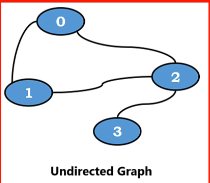

In [3]:
UG = Graph(4)
print("Empty Graph")
UG.display_adjMatrix()
UG.insert_edge(0, 1, both=True)
UG.insert_edge(0, 2, both=True)
UG.insert_edge(1, 2, both=True)
UG.insert_edge(2, 3, both=True)
print("\nFilled-in graph")
UG.display_adjMatrix()
print('\nVertices:', UG.vertex_count())
print('Edges:', UG.edge_count())
print('\nVertices:')
UG.vertices()
print('\n\nEdges:')
UG.edges()
print('\nEdge between 1--3:', UG.edge_exists(1,3))
print('Edge between 1--2:', UG.edge_exists(1,2))
print('\nDegree of vertex 2:', UG.indegree(2))
print('\nGraph Adjacency Matrix')
UG.display_adjMatrix()
UG.remove_edge(1, 2, True)
print('\nGraph Adjacency Matrix')
UG.display_adjMatrix()
print('\nEdge between 1--2:', UG.edge_exists(1,2))

Empty Graph
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Filled-in graph
[[0. 1. 1. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 1.]
 [0. 0. 1. 0.]]

Vertices: 4
Edges: 8

Vertices:
0 1 2 3 

Edges:
0 -- 1
0 -- 2
1 -- 0
1 -- 2
2 -- 0
2 -- 1
2 -- 3
3 -- 2

Edge between 1--3: False
Edge between 1--2: True

Degree of vertex 2: 3

Graph Adjacency Matrix
[[0. 1. 1. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 1.]
 [0. 0. 1. 0.]]

Graph Adjacency Matrix
[[0. 1. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 1. 0.]]

Edge between 1--2: False


<h3><b>Weighted Undirected Graphs</h3></b>

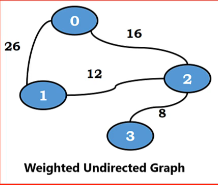

In [4]:
UG = Graph(4)
print("Empty Graph")
UG.display_adjMatrix()
UG.insert_edge(0, 1, 26, True)
UG.insert_edge(0, 2, 16, True)
UG.insert_edge(1, 2, 12, True)
UG.insert_edge(2, 3, 8, True)
print("\nFilled-in graph")
UG.display_adjMatrix()
print('\nVertices:', UG.vertex_count())
print('Edges:', UG.edge_count(False))
print('\nVertices:')
UG.vertices()
print('\n\nEdges:')
UG.edges()
print('\nEdge between 1--3:', UG.edge_exists(1,3))
print('Edge between 1--2:', UG.edge_exists(1,2))
print('\nDegree of vertex 2:', UG.indegree(2))
print('\nGraph Adjacency Matrix')
UG.display_adjMatrix()
UG.remove_edge(1, 2, True)
print('\nGraph Adjacency Matrix')
UG.display_adjMatrix()
print('\nEdge between 1--2:', UG.edge_exists(1,2))

Empty Graph
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Filled-in graph
[[ 0. 26. 16.  0.]
 [26.  0. 12.  0.]
 [16. 12.  0.  8.]
 [ 0.  0.  8.  0.]]

Vertices: 4
Edges: 4

Vertices:
0 1 2 3 

Edges:
0 -- 1
0 -- 2
1 -- 0
1 -- 2
2 -- 0
2 -- 1
2 -- 3
3 -- 2

Edge between 1--3: False
Edge between 1--2: True

Degree of vertex 2: 3

Graph Adjacency Matrix
[[ 0. 26. 16.  0.]
 [26.  0. 12.  0.]
 [16. 12.  0.  8.]
 [ 0.  0.  8.  0.]]

Graph Adjacency Matrix
[[ 0. 26. 16.  0.]
 [26.  0.  0.  0.]
 [16.  0.  0.  8.]
 [ 0.  0.  8.  0.]]

Edge between 1--2: False


<h3><b>Directed Graphs</h3></b>

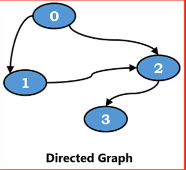

In [5]:
UG = Graph(4)
print("Empty Graph")
UG.display_adjMatrix()
UG.insert_edge(0, 1)
UG.insert_edge(0, 2)
UG.insert_edge(1, 2)
UG.insert_edge(2, 3)
print("\nFilled-in graph")
UG.display_adjMatrix()
print('\nVertices:', UG.vertex_count())
print('Edges:', UG.edge_count())
print('\nVertices:')
UG.vertices()
print('\n\nEdges:')
UG.edges()
print('\nEdge between 1--3:', UG.edge_exists(1,3))
print('Edge between 1--2:', UG.edge_exists(1,2))
print('\nIndegree of vertex 2:', UG.indegree(2))
print('Outdegree of vertex 2:', UG.outdegree(2))
print('\nGraph Adjacency Matrix')
UG.display_adjMatrix()
UG.remove_edge(1,2)
print('\nGraph Adjacency Matrix')
UG.display_adjMatrix()
print('\nEdge between 1--2:', UG.edge_exists(1,2))

Empty Graph
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Filled-in graph
[[0. 1. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]]

Vertices: 4
Edges: 4

Vertices:
0 1 2 3 

Edges:
0 -- 1
0 -- 2
1 -- 2
2 -- 3

Edge between 1--3: False
Edge between 1--2: True

Indegree of vertex 2: 1
Outdegree of vertex 2: 2

Graph Adjacency Matrix
[[0. 1. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]]

Graph Adjacency Matrix
[[0. 1. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]]

Edge between 1--2: False


<h3><b>Weighted Directed Graphs</h3></b>

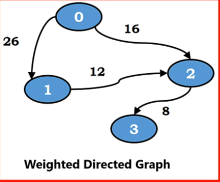

In [6]:
UG = Graph(4)
print("Empty Graph")
UG.display_adjMatrix()
UG.insert_edge(0, 1, 26)
UG.insert_edge(0, 2, 16)
UG.insert_edge(1, 2, 12)
UG.insert_edge(2, 3, 8)
print("\nFilled-in graph")
UG.display_adjMatrix()
print('\nVertices:', UG.vertex_count())
print('Edges:', UG.edge_count())
print('\nVertices:')
UG.vertices()
print('\n\nEdges:')
UG.edges()
print('\nEdge between 1--3:', UG.edge_exists(1,3))
print('Edge between 1--2:', UG.edge_exists(1,2))
print('\nIndegree of vertex 2:', UG.indegree(2))
print('Outdegree of vertex 2:', UG.outdegree(2))
print('\nGraph Adjacency Matrix')
UG.display_adjMatrix()
UG.remove_edge(1,2)
print('\nGraph Adjacency Matrix')
UG.display_adjMatrix()
print('\nEdge between 1--2:', UG.edge_exists(1,2))

Empty Graph
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Filled-in graph
[[ 0. 26. 16.  0.]
 [ 0.  0. 12.  0.]
 [ 0.  0.  0.  8.]
 [ 0.  0.  0.  0.]]

Vertices: 4
Edges: 4

Vertices:
0 1 2 3 

Edges:
0 -- 1
0 -- 2
1 -- 2
2 -- 3

Edge between 1--3: False
Edge between 1--2: True

Indegree of vertex 2: 1
Outdegree of vertex 2: 2

Graph Adjacency Matrix
[[ 0. 26. 16.  0.]
 [ 0.  0. 12.  0.]
 [ 0.  0.  0.  8.]
 [ 0.  0.  0.  0.]]

Graph Adjacency Matrix
[[ 0. 26. 16.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  8.]
 [ 0.  0.  0.  0.]]

Edge between 1--2: False


<br><h2><b>Graphs Traversals</b></h2>

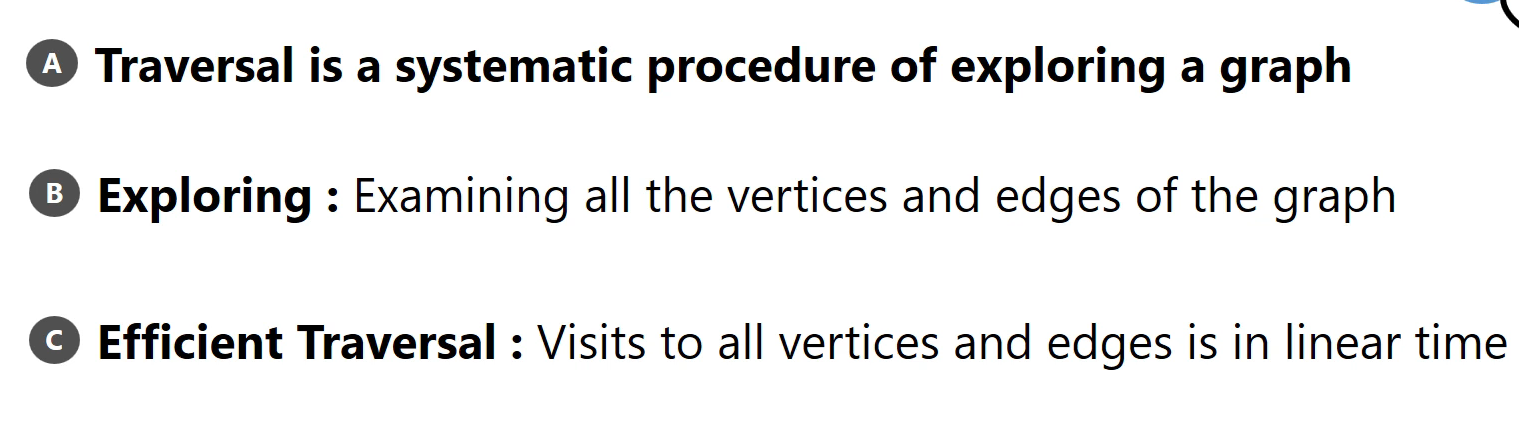

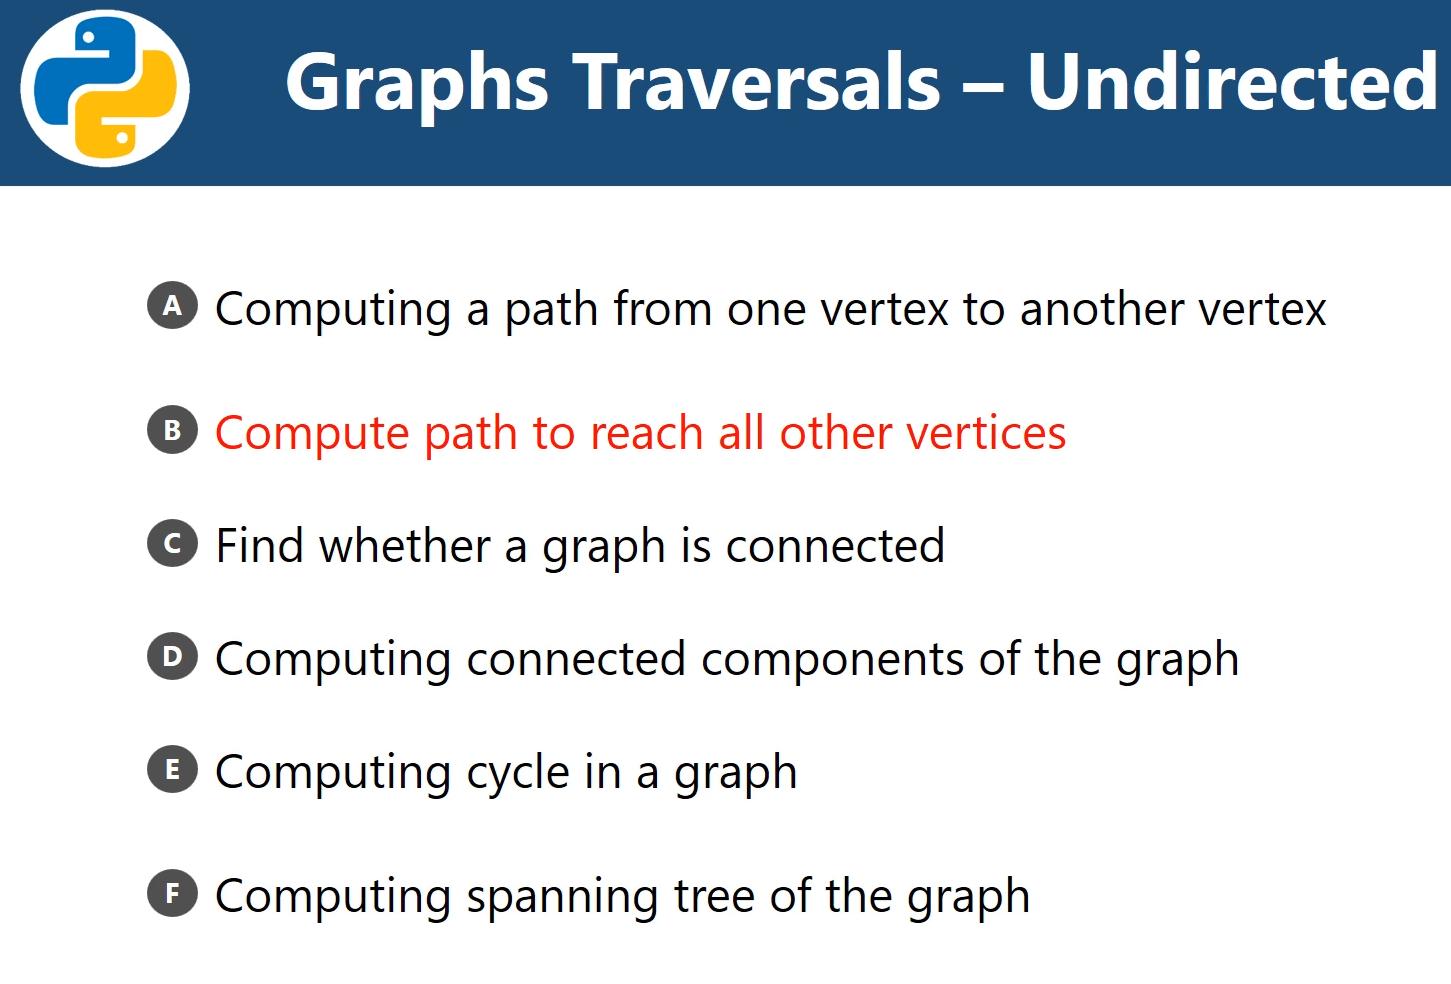

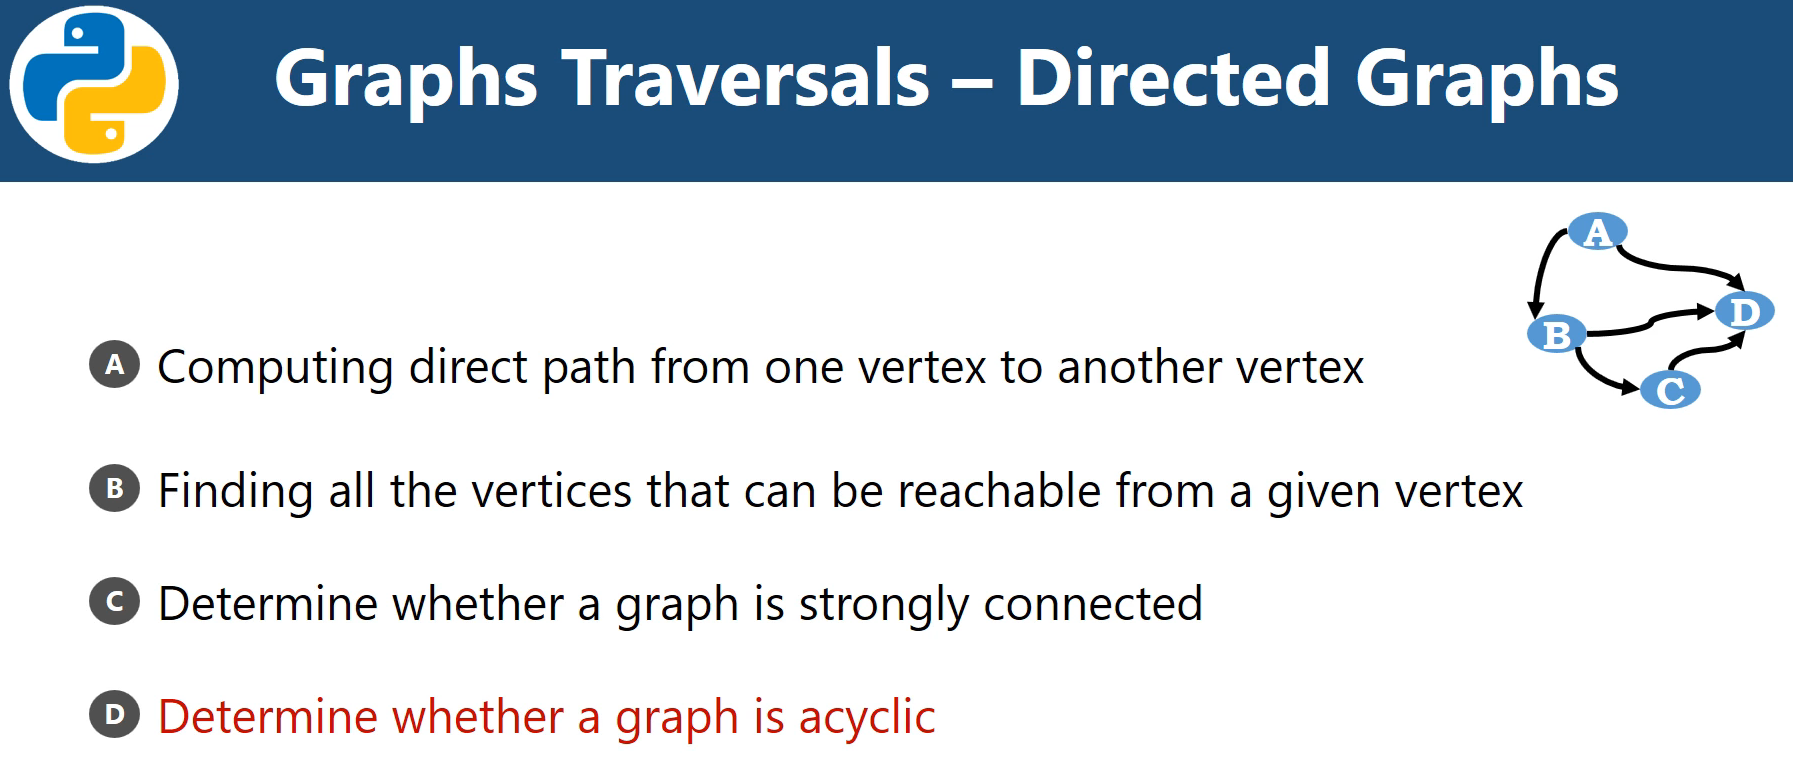

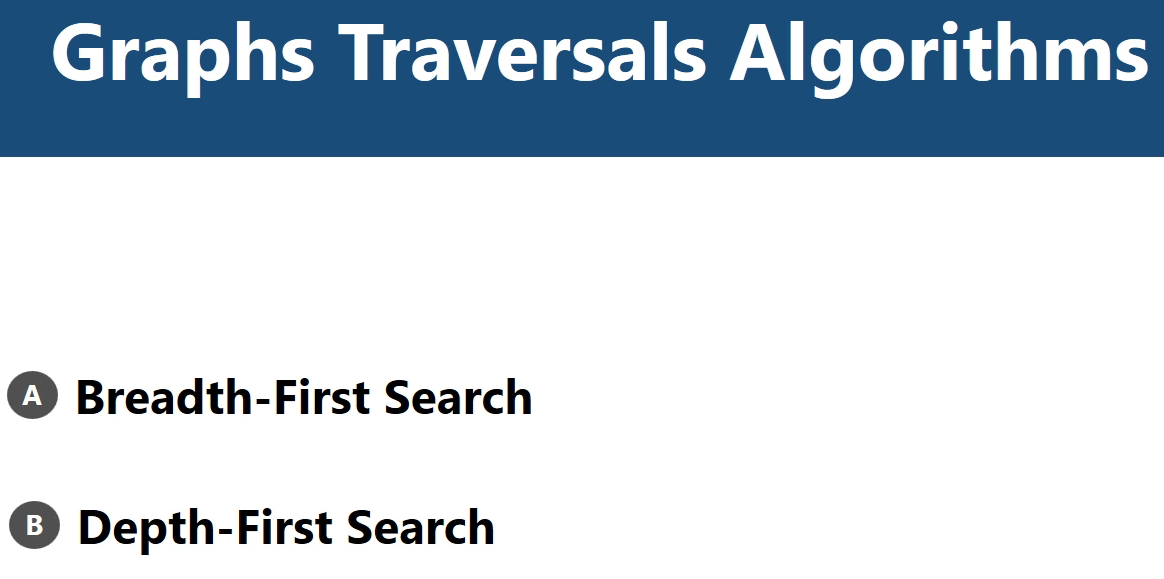

<br><br><h2><b>Breadth-First Search</b></h2>
<p style="font-size: 20px;">If we use an <b>adjacency matrix</b> to represent graphs, then its time complexity is <b>O(V^2)</b>, where V is the number of vertices in the graph.<br>
However, if we use <b>adjacency list</b> then BFS's time complexity is <b>O(V+E)</b>, where E is the number of edges in the graph.</p>


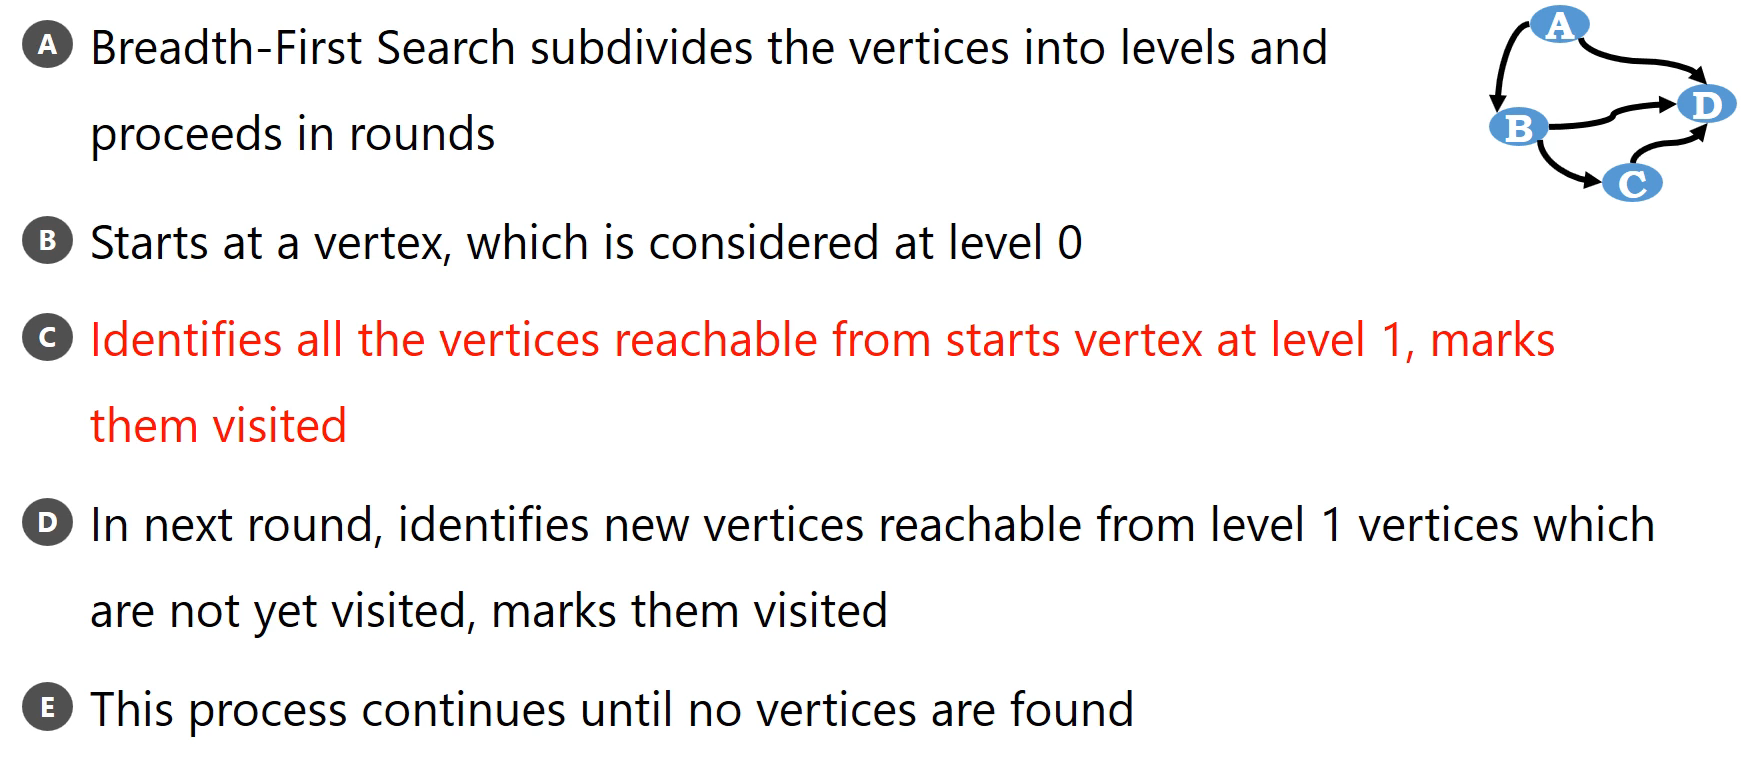

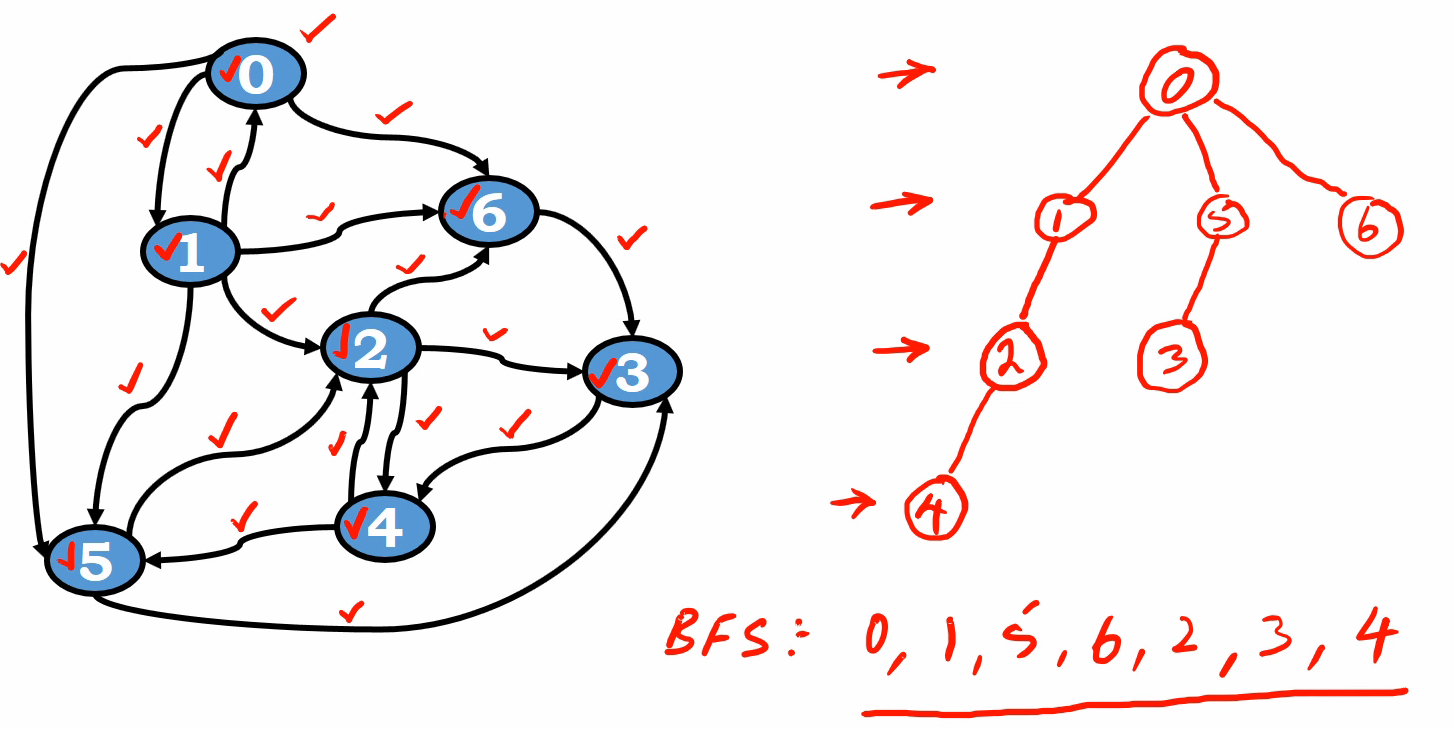

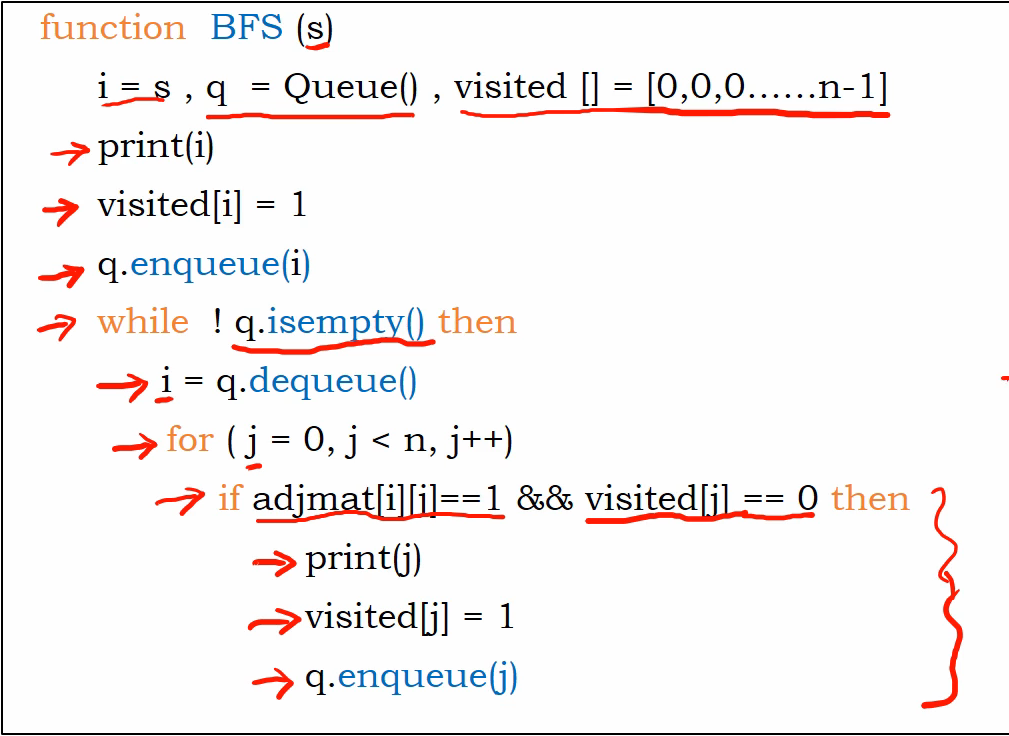

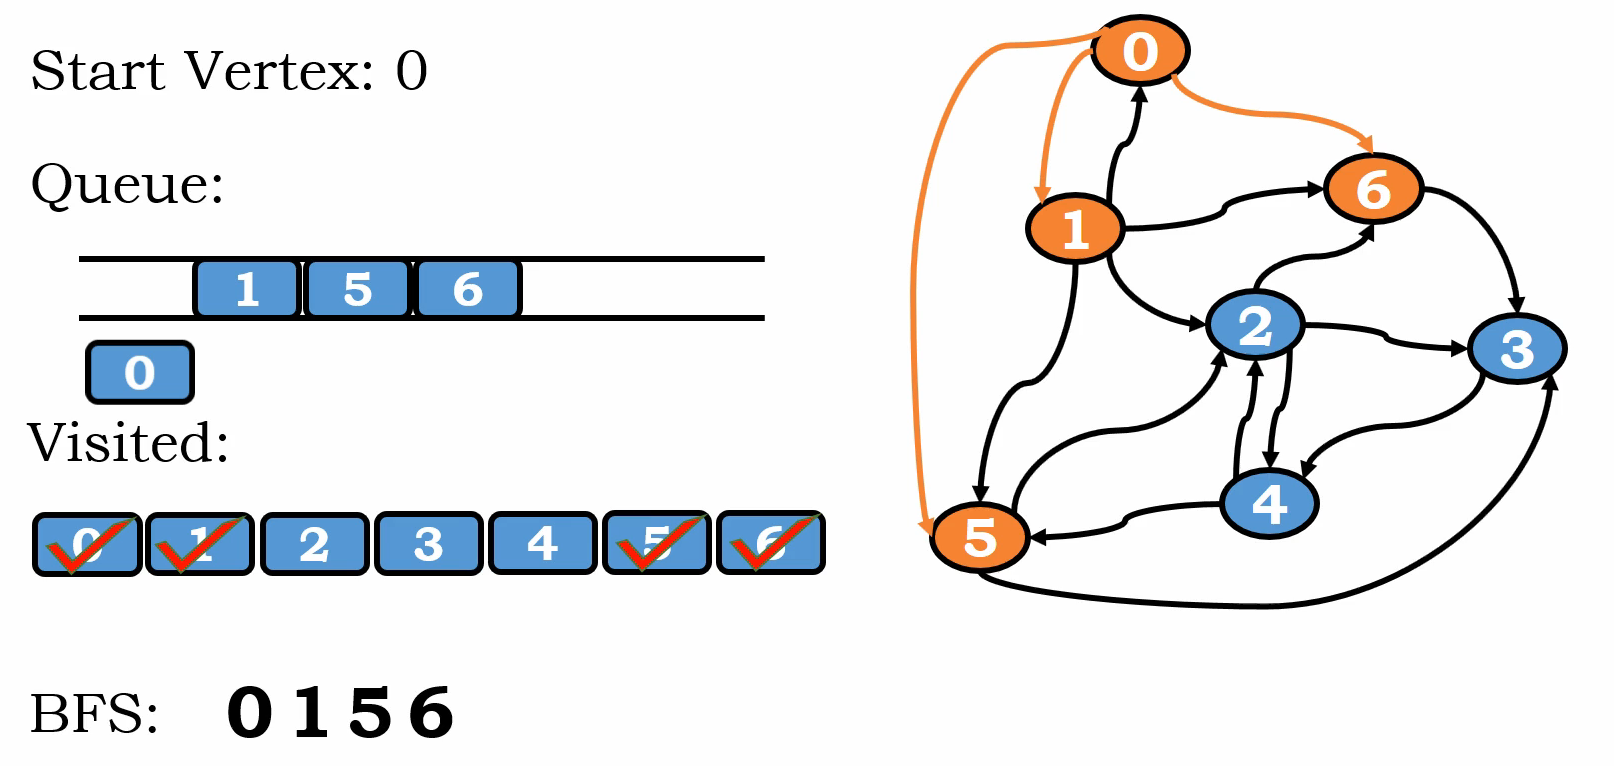

In [7]:
G = Graph(7)
G.insert_edge(0, 1, both=True)
G.insert_edge(0, 5)
G.insert_edge(0, 6)
G.insert_edge(1, 6)
G.insert_edge(1, 5)
G.insert_edge(1, 2)
G.insert_edge(2, 3)
G.insert_edge(2, 6)
G.insert_edge(2, 4, both=True)
G.insert_edge(3, 4)
G.insert_edge(4, 5)
G.insert_edge(5, 2)
G.insert_edge(5, 3)
G.insert_edge(6, 3)
G.display_adjMatrix()

[[0. 1. 0. 0. 0. 1. 1.]
 [1. 0. 1. 0. 0. 1. 1.]
 [0. 0. 0. 1. 1. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]


In [8]:
print('Breadth-First Search, starting vertex = 0:')
G.BFS(0)
print('\n\nBreadth-First Search, starting vertex = 1:')
G.BFS(1)

Breadth-First Search, starting vertex = 0:
0 1 5 6 2 3 4 

Breadth-First Search, starting vertex = 1:
1 0 2 5 6 3 4 

<br><br><h2><b>Depth-First Search</b></h2>
<p style="font-size: 20px;">If we use an <b>adjacency matrix</b> to represent graphs, then its time complexity is <b>O(V^2)</b>, where V is the number of vertices in the graph.<br>
However, if we use <b>adjacency list</b> then BFS's time complexity is <b>O(V+E)</b>, where E is the number of edges in the graph.</p>

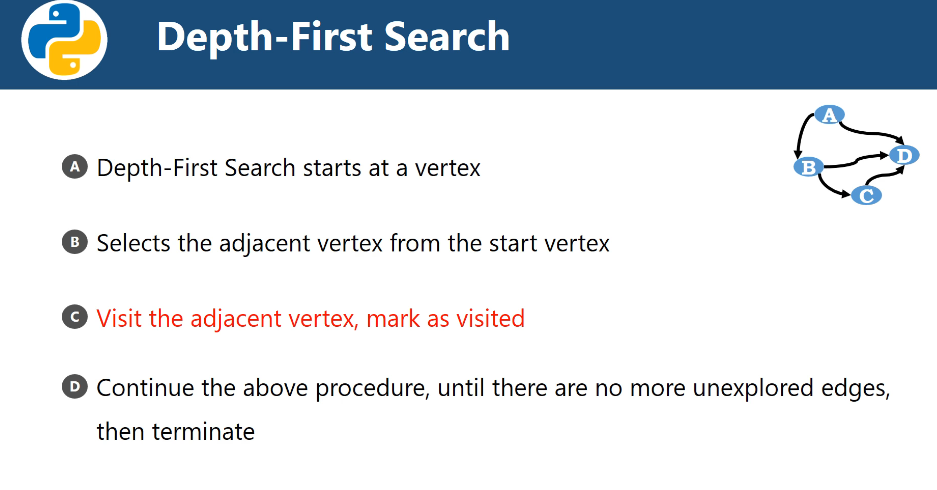

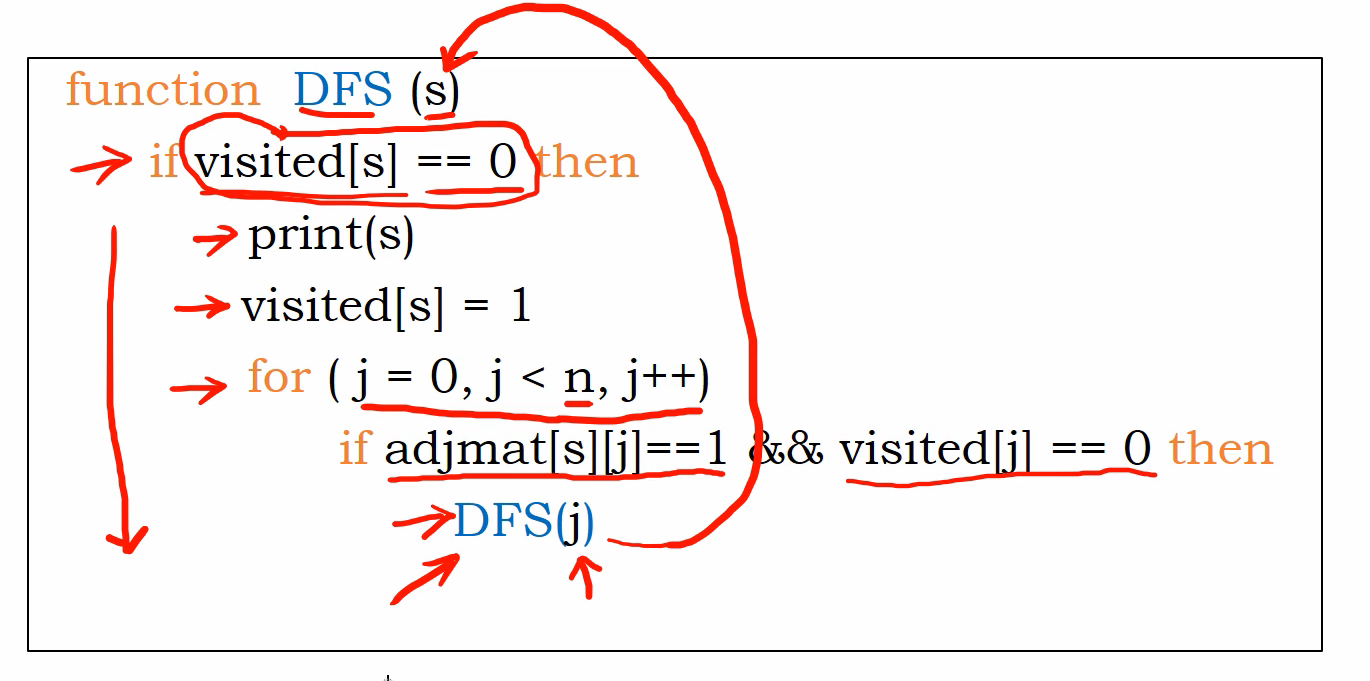

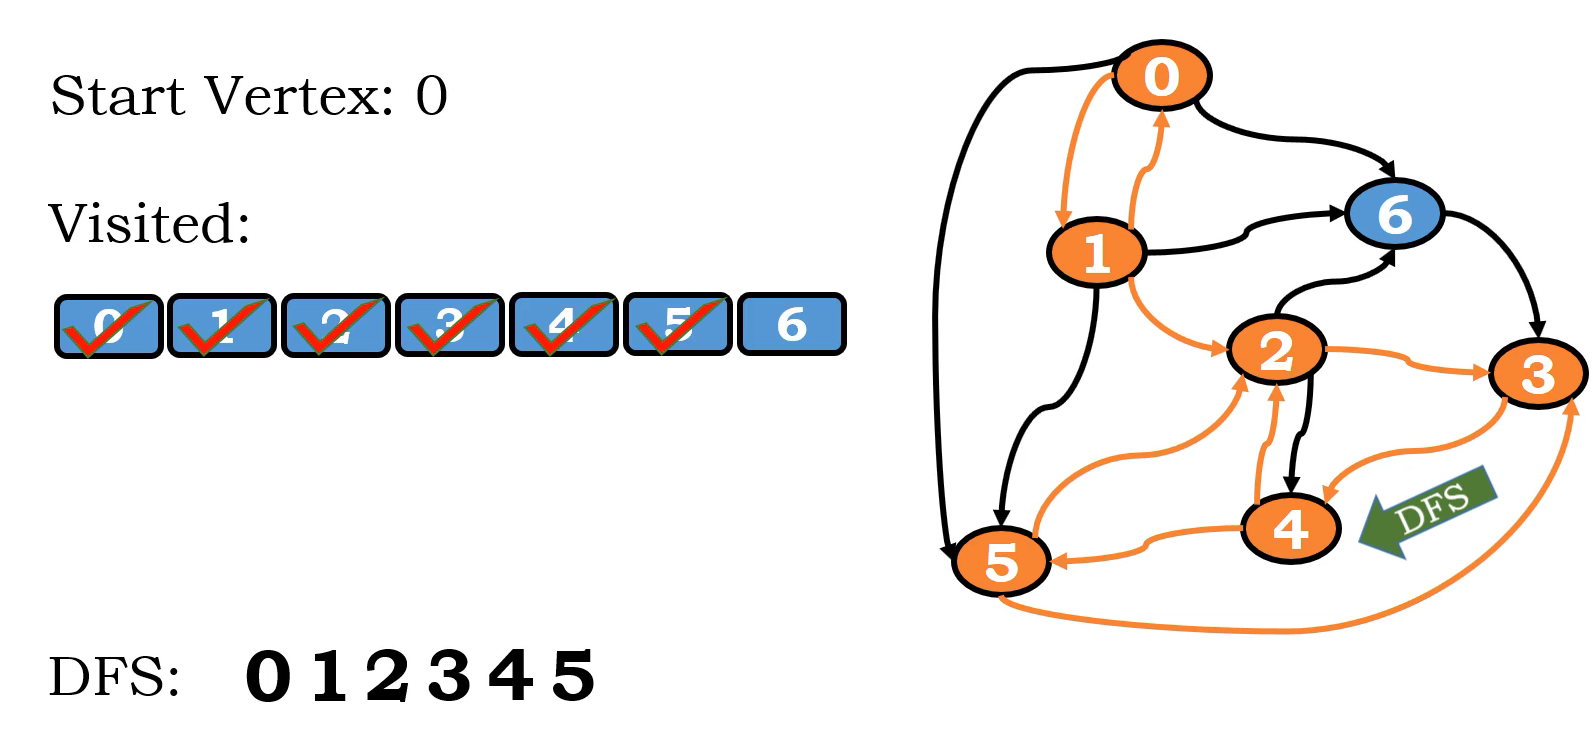

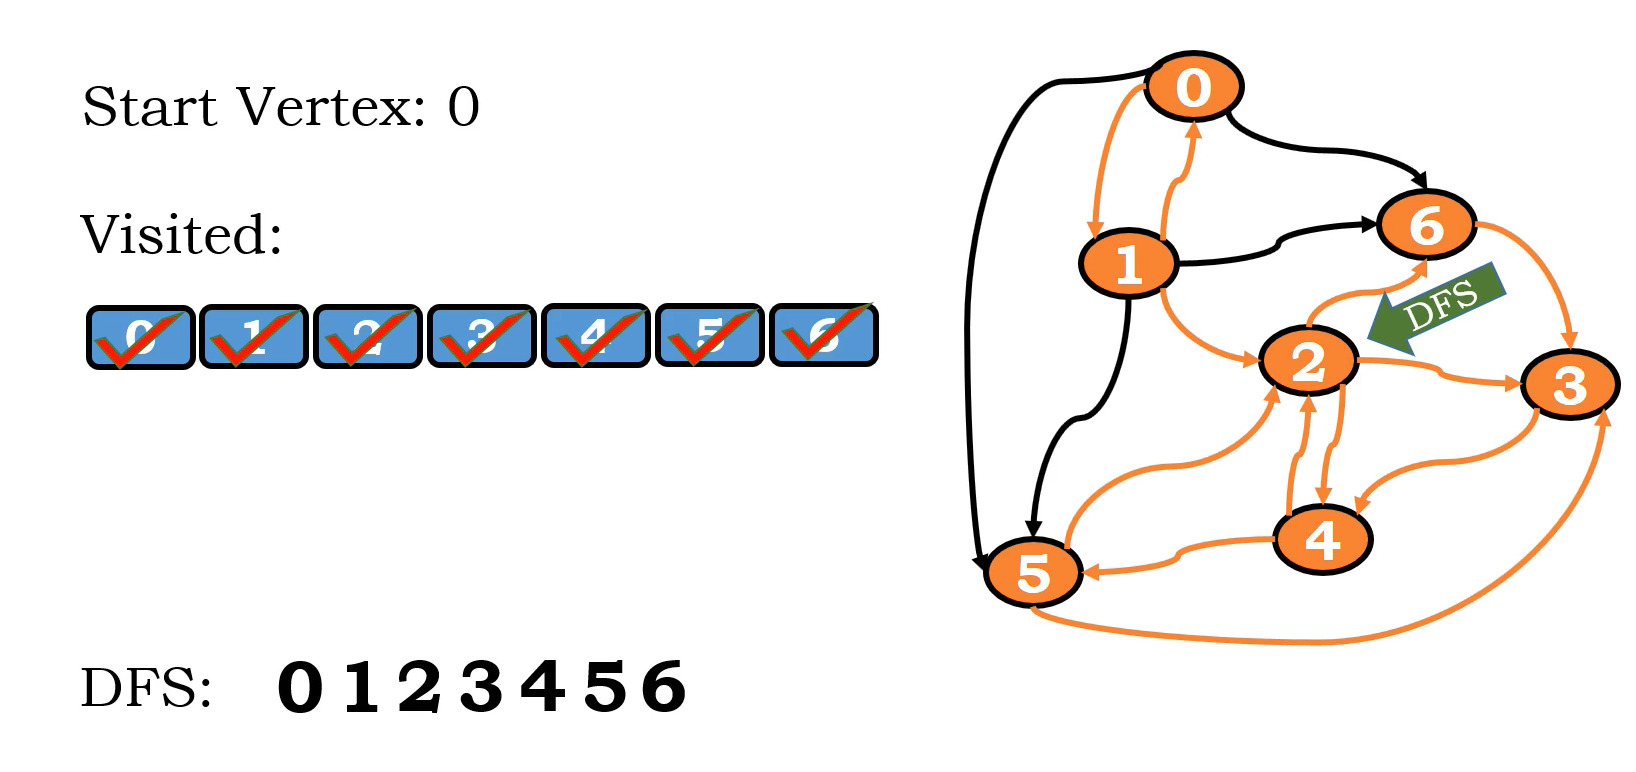

In [9]:
G.display_adjMatrix()

[[0. 1. 0. 0. 0. 1. 1.]
 [1. 0. 1. 0. 0. 1. 1.]
 [0. 0. 0. 1. 1. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]


In [10]:
print('Depth-First Search, starting vertex = 0:')
G.DFS(0)
G.clear_visited()
print('\n\nDepth-First Search, starting vertex = 1:')
G.DFS(1)
G.clear_visited()
print('\n\nDepth-First Search, starting vertex = 1:')
G.DFS(4)
G.clear_visited()

Depth-First Search, starting vertex = 0:
0 1 2 3 4 5 6 

Depth-First Search, starting vertex = 1:
1 0 5 2 3 4 6 

Depth-First Search, starting vertex = 1:
4 2 3 6 5 